In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing

In [103]:
df = pd.read_csv('Iris.csv')

In [104]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
df['Species'] = df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
df

C:\Users\jacqu\AppData\Local\Temp\ipykernel_41392\4010355472.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [106]:
features = df.drop('Species',axis=1)
target = df['Species']

print(features)
print(target)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [107]:
import sklearn.model_selection
import sklearn.neighbors


X_train,X_test,ytrain,ytest = sklearn.model_selection.train_test_split(features,target,train_size=0.8,test_size=0.2,random_state=49,shuffle=True,stratify=target)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)

In [108]:
model.fit(X_train,ytrain)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [109]:
trainPred = model.predict(X_train)

trainAcc = sklearn.metrics.accuracy_score(ytrain, trainPred)

print('Training accuracy :', trainAcc*100, '%')


Training accuracy : 100.0 %


In [110]:
ypred = model.predict(X_test)

testAcc = sklearn.metrics.accuracy_score(ytest,ypred)
print('Testing accuracy: ', testAcc*100, '%')

Testing accuracy:  100.0 %


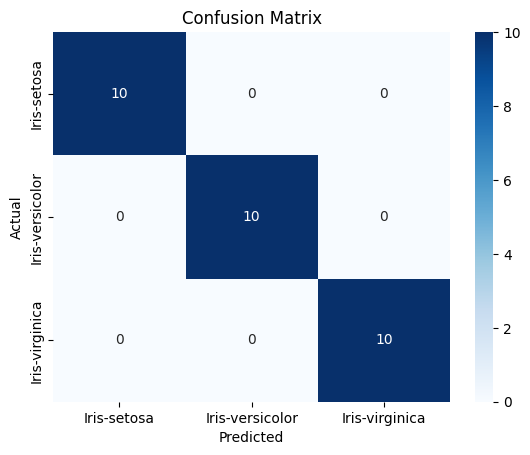

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [112]:
import sklearn.metrics


print(sklearn.metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

